Treinar modelo era

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input

In [25]:
df = pd.read_csv('oceanographic and meteorological dataset.csv')
df.head(5)
df

,time,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5,uo_cop,vo_cop,swh_cop,mwp_cop,mwd_cop,peak_period_cop
0,2025-01-01 00:00:00,-6.306534,14.981308,172.33765,8.959626,4.751488,10.330421,0.019531,0.160156,5.10,7.56,175.07,10.85
1,2025-01-01 01:00:00,-4.723419,14.342773,171.36377,8.907424,4.758851,10.286964,0.026367,0.164062,NaN,NaN,NaN,NaN
2,2025-01-01 02:00:00,-3.978439,12.770416,171.11426,8.913869,4.665862,10.272316,0.038086,0.162109,NaN,NaN,NaN,NaN
3,2025-01-01 03:00:00,-3.164124,15.130005,171.06311,8.911307,4.565788,10.260597,0.053711,0.155273,5.03,7.60,174.16,10.71
4,2025-01-01 04:00:00,-3.343689,12.074799,171.16702,8.862277,4.541395,10.223000,0.070312,0.143555,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988,2025-11-29 20:00:00,1.050568,-3.002213,321.76660,9.391575,1.740068,11.188332,-0.073242,-0.041992,NaN,NaN,NaN,NaN
7989,2025-11-29 21:00:00,0.547165,-2.844864,321.52417,9.404360,1.737550,11.162453,-0.093750,-0.019531,NaN,NaN,NaN,NaN
7990,2025-11-29 22:00:00,0.728592,-1.884628,321.26782,9.426389,1.733764,11.128273,-0.110352,0.005859,NaN,NaN,NaN,NaN
7991,2025-11-29 23:00:00,1.034180,-1.534332,321.06323,9.438893,1.730834,11.099464,-0.120117,0.032227,NaN,NaN,NaN,NaN


Treinar modelo para variavel mwd

In [26]:
colunas_para_remover = [
    'uo_cop', 'vo_cop', 'swh_cop', 'mwd_cop', 
    'mwp_cop', 'peak_period_cop', 'time',
]
df = df.drop(columns=colunas_para_remover, errors='ignore')
df.describe()

,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5
count,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000
mean,2.188604,-0.618673,254.533087,8.491293,2.289455,10.429202
std,5.049941,5.654880,101.285307,1.508553,1.293055,2.219554
min,-10.217163,-17.162354,0.005922,5.044391,0.706308,4.360695
25%,-1.410156,-4.420624,247.110920,7.368544,1.306941,8.810890
50%,2.046631,-1.186233,291.861820,8.303400,1.870715,10.276711
75%,5.630310,3.352921,320.586180,9.305229,2.910931,11.903175
max,21.640991,17.548920,359.915250,14.556703,8.823090,19.234710


Alterar variavel mwd para sin e cos

In [27]:
def add_direction_features(df, col):
    df[f'{col}_sin'] = np.sin(np.deg2rad(df[col]))
    df[f'{col}_cos'] = np.cos(np.deg2rad(df[col]))
    return df

In [28]:
df = add_direction_features(df, 'mwd_era5')

In [29]:
df.describe()

,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5,mwd_era5_sin,mwd_era5_cos
count,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000
mean,2.188604,-0.618673,254.533087,8.491293,2.289455,10.429202,-0.482059,0.436709
std,5.049941,5.654880,101.285307,1.508553,1.293055,2.219554,0.585773,0.483577
min,-10.217163,-17.162354,0.005922,5.044391,0.706308,4.360695,-1.000000,-0.999988
25%,-1.410156,-4.420624,247.110920,7.368544,1.306941,8.810890,-0.926656,0.149474
50%,2.046631,-1.186233,291.861820,8.303400,1.870715,10.276711,-0.712566,0.533409
75%,5.630310,3.352921,320.586180,9.305229,2.910931,11.903175,-0.268729,0.849137
max,21.640991,17.548920,359.915250,14.556703,8.823090,19.234710,1.000000,1.000000


Criar Modelo

In [30]:
def create_supervised_dataset(df, features, target, lookback, horizon):
    X, y = [], []

    data = df[features + [target]].values

    for i in range(lookback, len(df) - horizon):
        X.append(data[i - lookback:i, :-1])
        y.append(data[i + horizon, -1])

    return np.array(X), np.array(y)

In [31]:
def temporal_train_val_test_split(X, y, train=0.7, val=0.1):
    n = len(X)
    n_train = int(n * train)
    n_val = int(n * (train + val))

    X_train = X[:n_train]
    y_train = y[:n_train]

    X_val = X[n_train:n_val]
    y_val = y[n_train:n_val]

    X_test = X[n_val:]
    y_test = y[n_val:]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [32]:
def scale_data(X_train, X_test):
    n_samples, timesteps, n_features = X_train.shape

    scaler = StandardScaler()
    X_train_2d = X_train.reshape(-1, n_features)
    X_test_2d  = X_test.reshape(-1, n_features)

    X_train_scaled = scaler.fit_transform(X_train_2d)
    X_test_scaled  = scaler.transform(X_test_2d)

    X_train_scaled = X_train_scaled.reshape(n_samples, timesteps, n_features)
    X_test_scaled  = X_test_scaled.reshape(X_test.shape[0], timesteps, n_features)

    return X_train_scaled, X_test_scaled, scaler

In [33]:
def build_cnn_model(input_shape):
    model = Sequential([
        # Forma moderna de definir a entrada
        Input(shape=input_shape), 
        
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),

        
        Flatten(),
        Dense(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [ ]:
HORIZONS = [1, 3, 6, 12, 24]
LOOKBACK = 24

TARGETS = ['swh_era5', 'mwp_era5', 'pp1d_era5']
FEATURES_ERA5 = [
    'u10_era5',
    'v10_era5',
    'swh_era5',
    'mwd_era5_sin',
    'mwd_era5_cos',
    'mwp_era5',
    'pp1d_era5'
]
 
results = []

for target in TARGETS:
    for h in HORIZONS:

        print(f'\nTreinar target={target} | horizonte={h}h')

        # criar dataset
        X, y = create_supervised_dataset(
            df,
            FEATURES_ERA5,
            target,
            LOOKBACK,
            h
        )

        X_train, X_val, X_test, y_train, y_val, y_test = temporal_train_val_test_split(X, y)
        X_train, X_test, scaler = scale_data(X_train, X_test)

        model = build_cnn_model(X_train.shape[1:])

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val,y_val),
            epochs=20,
            batch_size=32,
            verbose=2,
            
        )

        y_pred = model.predict(X_test).ravel()

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae  = mean_absolute_error(y_test, y_pred)
        r2   = r2_score(y_test, y_pred)

        print(f'RMSE = {rmse:.3f} | MAE = {mae:.3f} | R2 = {r2:.3f}')

        results.append({
            'target': target,
            'horizon': h,
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        })  


Treinar target=swh_era5 | horizonte=1h
  -> Fold 1/3 em processamento...
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 11.
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     RMSE Fold 1: 0.4106
  -> Fold 2/3 em processamento...
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     RMSE Fold 2: 0.8059
  -> Fold 3/3 em processamento...
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 11.
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
     RMSE Fold 3: 0.1567

  Média RMSE (CV): 0.4577
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
  >>> RESULTADO FINAL TESTE: RMSE = 0.488 | R2 = 0.707

Treinar target=swh_era5 | horizonte=3h
  -> Fold 1/3 em processamento...
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     RMSE Fol

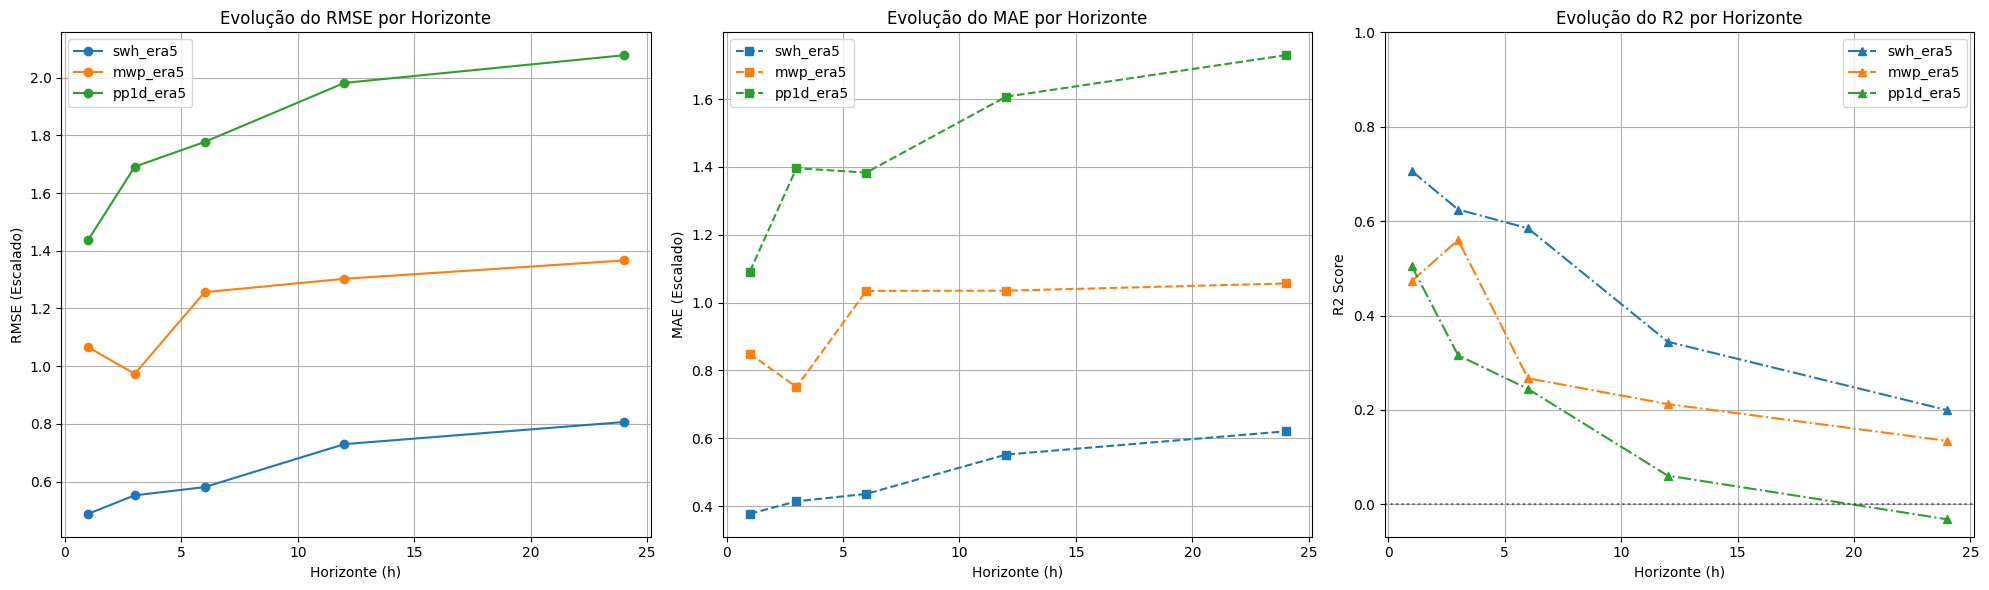

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.DataFrame(results)

# 1. Alterado para 1 linha e 3 colunas para incluir o R2
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

for target in TARGETS:
    subset = results_df[results_df['target'] == target]
    
    # Gráfico 1: RMSE
    ax1.plot(subset['horizon'], subset['rmse'], marker='o', label=target)
    
    # Gráfico 2: MAE
    ax2.plot(subset['horizon'], subset['mae'], marker='s', linestyle='--', label=target)
    
    # Gráfico 3: R2 (Novo)
    ax3.plot(subset['horizon'], subset['r2'], marker='^', linestyle='-.', label=target)

# Ajustes do gráfico de RMSE
ax1.set_title('Evolução do RMSE por Horizonte')
ax1.set_xlabel('Horizonte (h)')
ax1.set_ylabel('RMSE (Escalado)')
ax1.legend()
ax1.grid(True)

# Ajustes do gráfico de MAE
ax2.set_title('Evolução do MAE por Horizonte')
ax2.set_xlabel('Horizonte (h)')
ax2.set_ylabel('MAE (Escalado)')
ax2.legend()
ax2.grid(True)

# Ajustes do gráfico de R2
ax3.set_title('Evolução do R2 por Horizonte')
ax3.set_xlabel('Horizonte (h)')
ax3.set_ylabel('R2 Score')
# Adiciona uma linha horizontal no 0 para identificar onde o modelo falha
ax3.axhline(0, color='black', linestyle=':', alpha=0.5) 
ax3.set_ylim(None, 1.0) # O R2 não passa de 1.0
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

ERA5 sem variaveis corrente e vento

In [13]:
HORIZONS = [1, 3, 6, 12, 24]
LOOKBACK = 24

TARGETS = ['swh_era5', 'mwp_era5', 'pp1d_era5']
FEATURES = [
    'swh_era5',
    'mwd_era5_sin',
    'mwd_era5_cos',
    'mwp_era5',
    'pp1d_era5'
]

  
results = []

for target in TARGETS:
    for h in HORIZONS:

        print(f'\nTreinar target={target} | horizonte={h}h')

        # criar dataset
        X, y = create_supervised_dataset(
            df,
            FEATURES,
            target,
            LOOKBACK,
            h
        )

        X_train, X_val, X_test, y_train, y_val, y_test = temporal_train_val_test_split(X, y)

        X_train, X_test, scaler = scale_data(X_train, X_test)

        model = build_cnn_model(X_train.shape[1:])

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val,y_val),
            epochs=20,
            batch_size=32,
            verbose=2
        )

        y_pred = model.predict(X_test).ravel()

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae  = mean_absolute_error(y_test, y_pred)
        r2   = r2_score(y_test, y_pred)

        print(f'RMSE = {rmse:.3f} | MAE = {mae:.3f} | R2 = {r2:.3f}')

        results.append({
            'target': target,
            'horizon': h,
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        })



Treinar target=swh_era5 | horizonte=1h
Epoch 1/20
175/175 - 6s - 37ms/step - loss: 0.7621 - mae: 0.5554 - val_loss: 38.0446 - val_mae: 6.0818
Epoch 2/20
175/175 - 2s - 11ms/step - loss: 0.2053 - mae: 0.3103 - val_loss: 42.6990 - val_mae: 6.4479
Epoch 3/20
175/175 - 2s - 11ms/step - loss: 0.1819 - mae: 0.2913 - val_loss: 35.4358 - val_mae: 5.8656
Epoch 4/20
175/175 - 2s - 12ms/step - loss: 0.1503 - mae: 0.2641 - val_loss: 34.5347 - val_mae: 5.7947
Epoch 5/20
175/175 - 2s - 11ms/step - loss: 0.1568 - mae: 0.2684 - val_loss: 28.8551 - val_mae: 5.3025
Epoch 6/20
175/175 - 2s - 11ms/step - loss: 0.1365 - mae: 0.2512 - val_loss: 38.8305 - val_mae: 6.1488
Epoch 7/20
175/175 - 2s - 11ms/step - loss: 0.1259 - mae: 0.2406 - val_loss: 39.9725 - val_mae: 6.2444
Epoch 8/20
175/175 - 2s - 12ms/step - loss: 0.1255 - mae: 0.2400 - val_loss: 22.6801 - val_mae: 4.7049
Epoch 9/20
175/175 - 2s - 11ms/step - loss: 0.1135 - mae: 0.2296 - val_loss: 31.0378 - val_mae: 5.5081
Epoch 10/20
175/175 - 2s - 11ms/s

In [14]:
results_df['Versão'] = 'Completo'
results_df_vento = pd.DataFrame(results)
results_df_vento['Versão'] = 'Sem Vento/Corr.'

# 2. Concatenar os dois DataFrames
df_final = pd.concat([results_df, results_df_vento])

# 3. Criar a Pivot Table com Multi-Index nas colunas
# O index será o horizonte, e as colunas serão divididas por Target e depois por Versão
pivot_comparativa = df_final.pivot_table(
    index='horizon', 
    columns=['target', 'Versão'], 
    values='rmse'
)

print("\n--- COMPARAÇÃO DE RESULTADOS (RMSE): COM VS SEM VARIÁVEIS EXÓGENAS ---")
display(pivot_comparativa.round(4))

# --- CORREÇÃO PARA O MAE ---
print("\n--- COMPARAÇÃO DE RESULTADOS (MAE): COM VS SEM VARIÁVEIS EXÓGENAS ---")

# Usamos o df_final (que contém 'Completo' e 'Sem Vento/Corr.')
pivot_mae_comparativa = df_final.pivot_table(
    index='horizon', 
    columns=['target', 'Versão'], 
    values='mae'
)

display(pivot_mae_comparativa.round(4))


--- COMPARAÇÃO DE RESULTADOS (RMSE): COM VS SEM VARIÁVEIS EXÓGENAS ---


target  mwp_era5                 pp1d_era5                 swh_era5  \
Versão  Completo Sem Vento/Corr.  Completo Sem Vento/Corr. Completo   
horizon                                                               
1         0.6330          0.4315    1.0461          0.9360   0.3172   
3         0.6745          0.5729    1.2764          1.1639   0.4393   
6         0.8396          0.9077    1.5851          1.4476   0.5232   
12        1.1785          1.0684    1.8813          1.6539   0.7745   
24        1.5257          1.4075    2.3230          2.2058   0.9744   

target                   
Versão  Sem Vento/Corr.  
horizon                  
1                0.3434  
3                0.5172  
6                0.6380  
12               0.8036  
24               0.9272


--- COMPARAÇÃO DE RESULTADOS (MAE): COM VS SEM VARIÁVEIS EXÓGENAS ---


target  mwp_era5                 pp1d_era5                 swh_era5  \
Versão  Completo Sem Vento/Corr.  Completo Sem Vento/Corr. Completo   
horizon                                                               
1         0.5201          0.3162    0.7567          0.6311   0.1879   
3         0.5340          0.4295    0.9247          0.8114   0.2600   
6         0.6378          0.7035    1.2390          1.0959   0.3624   
12        0.9146          0.8236    1.4866          1.2394   0.5676   
24        1.2832          1.1545    1.9038          1.7752   0.7119   

target                   
Versão  Sem Vento/Corr.  
horizon                  
1                0.1853  
3                0.2857  
6                0.4144  
12               0.5630  
24               0.7112

CNN para variavel sen e cos

In [36]:
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='linear'))  # sin e cos
    model.compile(optimizer='adam', loss='mse')
    return model

In [37]:
def angular_error_deg(true, pred):
    """Diferença angular mínima em graus"""
    delta = np.arctan2(np.sin(np.deg2rad(pred - true)),
                       np.cos(np.deg2rad(pred - true)))
    return np.rad2deg(delta)

In [38]:
def create_supervised_dataset(df, features, target, lookback, horizon):
    X, y = [], []
    
    data = df[features + target].values  # target já pode ser lista
    n_features = len(features)
    n_targets = len(target)

    for i in range(lookback, len(df) - horizon):
        # X = todos os features nos últimos 'lookback' timesteps
        X.append(data[i - lookback:i, :n_features])
        # y = todos os targets no passo 'horizon' à frente
        y.append(data[i + horizon, n_features:n_features + n_targets])

    X = np.array(X)
    y = np.array(y)
    
    return X, y

In [39]:
def circular_metrics(y_true, y_pred):
    # 1. Calcular a diferença absoluta (0-360)
    diff = np.abs(y_true - y_pred) % 360
    
    # 2. Ajustar para o caminho mais curto (se diff > 180, o erro real é 360 - diff)
    # Exemplo: Real 1°, Previsto 359° -> diff = 358. Ajustado = 360 - 358 = 2°
    shortest_diff = np.where(diff > 180, 360 - diff, diff)
    
    # 3. Calcular métricas baseadas na diferença corrigida
    rmse_circ = np.sqrt(np.mean(shortest_diff**2))
    mae_circ = np.mean(shortest_diff)
    
    return rmse_circ, mae_circ

In [44]:
HORIZONS = [1, 3, 6, 12, 24]
LOOKBACK = 24

TARGETS = ['mwd_era5_sin','mwd_era5_cos']  # prever ambos juntos
FEATURES_ERA5 = [
    'u10_era5',
    'v10_era5',
    'swh_era5',
    'mwd_era5_sin',
    'mwd_era5_cos',
    'mwp_era5',
    'pp1d_era5'
]

results = []

# ===== Loop de treino =====
for h in HORIZONS:

    print(f'\n===== Horizonte {h}h =====\n')

    # criar dataset com os dois targets
    X, y = create_supervised_dataset(
        df,
        FEATURES_ERA5,
        target=TARGETS,  # sin e cos juntos
        lookback=LOOKBACK,
        horizon=h
    )

    X_train, X_val, X_test, y_train, y_val, y_test = temporal_train_val_test_split(X, y)
    X_train, X_test, scaler = scale_data(X_train, X_test)

    model = build_cnn_model(X_train.shape[1:])
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val,y_val),
        epochs=20,
        batch_size=32,
        verbose=2
    )

    # Previsões
    y_pred = model.predict(X_test).ravel()

    if 'mwd' in target:
            rmse, mae = circular_metrics(y_test, y_pred)
            # O R2 para variáveis circulares é complexo, 
            # nestes casos é melhor focar no RMSE e MAE.
            r2 = r2_score(y_test, y_pred) 
    else:
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae  = mean_absolute_error(y_test, y_pred)
            r2   = r2_score(y_test, y_pred)

    print(f'Métricas Corrigidas ({target}): RMSE = {rmse:.3f} | MAE = {mae:.3f}')

   


===== Horizonte 1h =====

Epoch 1/20
175/175 - 1s - 7ms/step - loss: 0.0366 - val_loss: 2.9675
Epoch 2/20
175/175 - 0s - 2ms/step - loss: 0.0120 - val_loss: 1.5609
Epoch 3/20
175/175 - 0s - 3ms/step - loss: 0.0083 - val_loss: 1.4572
Epoch 4/20
175/175 - 0s - 2ms/step - loss: 0.0065 - val_loss: 1.8661
Epoch 5/20
175/175 - 0s - 2ms/step - loss: 0.0056 - val_loss: 1.4080
Epoch 6/20
175/175 - 0s - 2ms/step - loss: 0.0053 - val_loss: 1.7530
Epoch 7/20
175/175 - 0s - 3ms/step - loss: 0.0045 - val_loss: 1.7382
Epoch 8/20
175/175 - 0s - 2ms/step - loss: 0.0038 - val_loss: 1.6797
Epoch 9/20
175/175 - 0s - 3ms/step - loss: 0.0031 - val_loss: 1.7744
Epoch 10/20
175/175 - 0s - 2ms/step - loss: 0.0035 - val_loss: 1.7218
Epoch 11/20
175/175 - 0s - 2ms/step - loss: 0.0031 - val_loss: 1.1184
Epoch 12/20
175/175 - 0s - 3ms/step - loss: 0.0029 - val_loss: 1.6061
Epoch 13/20
175/175 - 0s - 2ms/step - loss: 0.0032 - val_loss: 1.5001
Epoch 14/20
175/175 - 0s - 3ms/step - loss: 0.0028 - val_loss: 1.4542
Ep

ValueError: Found input variables with inconsistent numbers of samples: [1594, 3188]

In [19]:
df_results_mwd = pd.DataFrame([
    {
        'horizon': r['horizon'],
        'target': 'mwd_era5',
        'Versão': 'Completo',
        'rmse': r['rmse_angle'],
        'mae': r['mae_angle']
    }
    for r in results
])

print(df_results_mwd)


Empty DataFrame
Columns: []
Index: []


In [20]:
HORIZONS = [1, 3, 6, 12, 24]
LOOKBACK = 24

TARGETS = ['mwd_era5_sin','mwd_era5_cos']  # prever ambos juntos
FEATURES_ERA5 = [
    'swh_era5',
    'mwd_era5_sin',
    'mwd_era5_cos',
    'mwp_era5',
    'pp1d_era5'
]

results = []

# ===== Loop de treino =====
for h in HORIZONS:

    print(f'\n===== Horizonte {h}h =====\n')

    # criar dataset com os dois targets
    X, y = create_supervised_dataset(
        df,
        FEATURES_ERA5,
        target=TARGETS,  # sin e cos juntos
        lookback=LOOKBACK,
        horizon=h
    )

    X_train, X_val, X_test, y_train, y_val, y_test = temporal_train_val_test_split(X, y)
    X_train, X_test, scaler = scale_data(X_train, X_test)

    model = build_cnn_model(X_train.shape[1:])
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val,y_val),
        epochs=20,
        batch_size=32,
        verbose=2
    )

    # Previsões
    y_pred = model.predict(X_test)

    # Reconstruir ângulo
    y_test_angle = np.rad2deg(np.arctan2(y_test[:,0], y_test[:,1]))
    y_pred_angle = np.rad2deg(np.arctan2(y_pred[:,0], y_pred[:,1]))

    # Erro angular mínimo
    angle_error = angular_error_deg(y_test_angle, y_pred_angle)

    # Métricas
    rmse_sin_cos = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_sin_cos  = mean_absolute_error(y_test, y_pred)
    r2_sin_cos   = r2_score(y_test, y_pred)

    mae_angle = np.mean(np.abs(angle_error))
    rmse_angle = np.sqrt(np.mean(angle_error**2))

    print(f'MSE/MAE/R2 (sin+cos): RMSE={rmse_sin_cos:.3f}, MAE={mae_sin_cos:.3f}, R2={r2_sin_cos:.3f}')
    print(f'Erro angular: MAE={mae_angle:.2f}°, RMSE={rmse_angle:.2f}°')

    # Guardar resultados
    results.append({
        "horizon": h,
        "rmse_sin_cos": rmse_sin_cos,
        "mae_sin_cos": mae_sin_cos,
        "r2_sin_cos": r2_sin_cos,
        "mae_angle": mae_angle,
        "rmse_angle": rmse_angle,
        "y_test": y_test,
        "y_pred": y_pred,
        "y_test_angle": y_test_angle,
        "y_pred_angle": y_pred_angle
    })


===== Horizonte 1h =====

Epoch 1/20
175/175 - 5s - 28ms/step - loss: 0.0429 - val_loss: 1.9233
Epoch 2/20
175/175 - 1s - 8ms/step - loss: 0.0104 - val_loss: 1.2228
Epoch 3/20
175/175 - 1s - 7ms/step - loss: 0.0073 - val_loss: 1.4338
Epoch 4/20
175/175 - 1s - 7ms/step - loss: 0.0062 - val_loss: 2.2405
Epoch 5/20
175/175 - 1s - 7ms/step - loss: 0.0056 - val_loss: 1.0285
Epoch 6/20
175/175 - 1s - 7ms/step - loss: 0.0048 - val_loss: 1.3055
Epoch 7/20
175/175 - 1s - 7ms/step - loss: 0.0043 - val_loss: 1.0777
Epoch 8/20
175/175 - 1s - 7ms/step - loss: 0.0039 - val_loss: 1.4506
Epoch 9/20
175/175 - 1s - 7ms/step - loss: 0.0038 - val_loss: 1.7281
Epoch 10/20
175/175 - 1s - 7ms/step - loss: 0.0035 - val_loss: 1.0787
Epoch 11/20
175/175 - 1s - 7ms/step - loss: 0.0033 - val_loss: 1.2431
Epoch 12/20
175/175 - 1s - 8ms/step - loss: 0.0031 - val_loss: 1.2222
Epoch 13/20
175/175 - 1s - 8ms/step - loss: 0.0031 - val_loss: 1.5034
Epoch 14/20
175/175 - 1s - 8ms/step - loss: 0.0026 - val_loss: 1.4428
E

In [21]:
df_results_mwd_vento = pd.DataFrame([
    {
        'horizon': r['horizon'],
        'target': 'mwd_era5',
        'Versão': 'Sem Vento/Corr.',
        'rmse': r['rmse_angle'],
        'mae': r['mae_angle']
    }
    for r in results
])

print(df_results_mwd_vento)

   horizon    target           Versão       rmse        mae
0        1  mwd_era5  Sem Vento/Corr.   8.656825   4.576520
1        3  mwd_era5  Sem Vento/Corr.  14.766719   7.914583
2        6  mwd_era5  Sem Vento/Corr.  22.543632  12.584143
3       12  mwd_era5  Sem Vento/Corr.  35.056086  22.042320
4       24  mwd_era5  Sem Vento/Corr.  49.868826  35.922260


In [23]:
df_final = pd.concat([results_df, results_df_vento, df_results_mwd, df_results_mwd_vento])

# 4. Criar as Pivot Tables (o código da Pivot não muda, ela organiza sozinha!)
pivot_comparativa = df_final.pivot_table(
    index='horizon', 
    columns=['target', 'Versão'], 
    values='rmse'
)

pivot_mae_comparativa = df_final.pivot_table(
    index='horizon', 
    columns=['target', 'Versão'], 
    values='mae'
)

print("\n--- COMPARAÇÃO DE RESULTADOS (RMSE) ---")
display(pivot_comparativa.round(4))

print("\n--- COMPARAÇÃO DE RESULTADOS (MAE) ---")
display(pivot_mae_comparativa.round(4))


--- COMPARAÇÃO DE RESULTADOS (RMSE) ---


target         mwd_era5 mwp_era5                 pp1d_era5                  \
Versão  Sem Vento/Corr. Completo Sem Vento/Corr.  Completo Sem Vento/Corr.   
horizon                                                                      
1                8.6568   0.6330          0.4315    1.0461          0.9360   
3               14.7667   0.6745          0.5729    1.2764          1.1639   
6               22.5436   0.8396          0.9077    1.5851          1.4476   
12              35.0561   1.1785          1.0684    1.8813          1.6539   
24              49.8688   1.5257          1.4075    2.3230          2.2058   

target  swh_era5                  
Versão  Completo Sem Vento/Corr.  
horizon                           
1         0.3172          0.3434  
3         0.4393          0.5172  
6         0.5232          0.6380  
12        0.7745          0.8036  
24        0.9744          0.9272


--- COMPARAÇÃO DE RESULTADOS (MAE) ---


target         mwd_era5 mwp_era5                 pp1d_era5                  \
Versão  Sem Vento/Corr. Completo Sem Vento/Corr.  Completo Sem Vento/Corr.   
horizon                                                                      
1                4.5765   0.5201          0.3162    0.7567          0.6311   
3                7.9146   0.5340          0.4295    0.9247          0.8114   
6               12.5841   0.6378          0.7035    1.2390          1.0959   
12              22.0423   0.9146          0.8236    1.4866          1.2394   
24              35.9223   1.2832          1.1545    1.9038          1.7752   

target  swh_era5                  
Versão  Completo Sem Vento/Corr.  
horizon                           
1         0.1879          0.1853  
3         0.2600          0.2857  
6         0.3624          0.4144  
12        0.5676          0.5630  
24        0.7119          0.7112